In [5]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [11]:
X,y = make_moons(n_samples = 1000,noise= 0.8)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Generate an Initial Voting Classifier

In [12]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(estimators = [('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)], voting='soft')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [13]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__ , accuracy_score(y_test,y_pred))

LogisticRegression 0.775
RandomForestClassifier 0.735
SVC 0.775
VotingClassifier 0.76


## Bagging vs Pasting

/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


Dual tree OOB score: 0.6825
Bag OOB score: 0.72


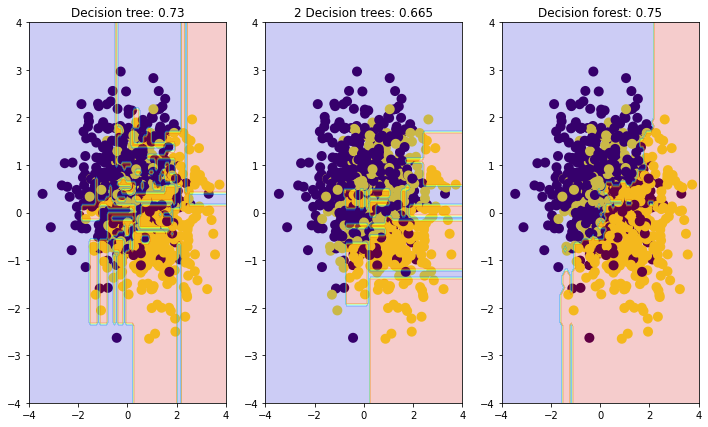

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

tree2_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 2, max_samples = 100, bootstrap = True, n_jobs = -1, oob_score= True)
tree2_clf.fit(X_train,y_train)


bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1, oob_score= True)
bag_clf.fit(X_train,y_train)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

x1g,x2g= np.meshgrid(np.linspace(-4,4,100), np.linspace(-4,4,100))
xgrid_pred = np.c_[x1g.ravel(),x2g.ravel()]

bag_preds = bag_clf.predict(xgrid_pred)
tree2_preds = tree2_clf.predict(xgrid_pred)
tree_preds = tree_clf.predict(xgrid_pred)


fig,ax = plt.subplots(ncols=3,figsize=(12,7))
ax[0].scatter(X_train[:,0],X_train[:,1],c = y_train,linewidth= 4)
ax[0].contourf(x1g,x2g,tree_preds.reshape(x2g.shape),alpha = 0.2,cmap = 'jet')
ax[0].set_title('Decision tree: ' + str(accuracy_score(y_test,tree_clf.predict(X_test))))

ax[1].scatter(X_train[:,0],X_train[:,1],c = y_train,linewidth= 4)
ax[1].contourf(x1g,x2g,tree2_preds.reshape(x2g.shape),alpha = 0.2,cmap = 'jet')
ax[1].set_title('2 Decision trees: ' + str(accuracy_score(y_test,tree2_clf.predict(X_test))))

ax[2].scatter(X_train[:,0],X_train[:,1],c = y_train,linewidth= 4)
ax[2].contourf(x1g,x2g,bag_preds.reshape(x2g.shape),alpha = 0.2,cmap = 'jet')
ax[2].set_title('Decision forest: ' + str(accuracy_score(y_test,bag_clf.predict(X_test))))

print('Dual tree OOB score: ' + str(tree2_clf.oob_score_))
print('Bag OOB score: ' +str(bag_clf.oob_score_))

## Decision Forest

Text(0.5, 1.0, '0.735')

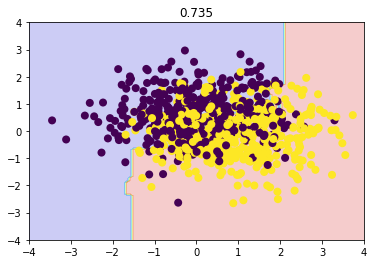

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16,n_jobs = -1)
rnd_clf.fit(X_train,y_train)
forest_preds=  rnd_clf.predict(xgrid_pred)

plt.contourf(x1g,x2g,forest_preds.reshape(x1g.shape),cmap='jet',alpha = 0.2)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train,linewidth=2)


plt.title(accuracy_score(y_test,rnd_clf.predict(X_test)))

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(iris['data'],iris['target'])

for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.1061565762933397
sepal width (cm) 0.025838632515036517
petal length (cm) 0.45259381394564335
petal width (cm) 0.4154109772459805


Text(0.5, 1.0, 'Pixel importance in the MNIST dataset')

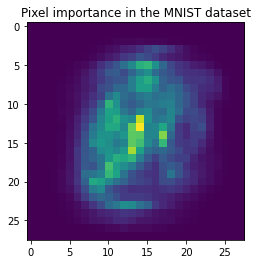

In [17]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rnd_clf.fit(mnist['data'],mnist['target'])

plt.imshow(rnd_clf.feature_importances_.reshape(28,28))
plt.title('Pixel importance in the MNIST dataset')

## ADA Boost

Text(0, 0.5, 'Predictor Weight')

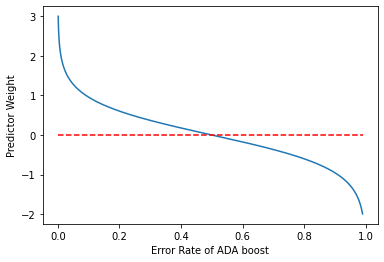

In [18]:
xi = np.linspace(.001,.99,1000)
plt.plot(xi,np.log10((1-xi)/xi))
plt.plot(xi,np.zeros(xi.shape),'--r')
plt.xlabel('Error Rate of ADA boost')
plt.ylabel('Predictor Weight')

Text(0.5, 1.0, '0.735')

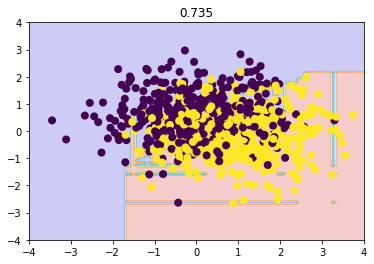

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators = 200, algorithm = 'SAMME.R',learning_rate =0.5)
ada_clf.fit(X_train,y_train)
ada_preds=  ada_clf.predict(xgrid_pred)

plt.contourf(x1g,x2g,ada_preds.reshape(x1g.shape),cmap='jet',alpha = 0.2)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train,linewidth=2)

plt.title(accuracy_score(y_test,ada_clf.predict(X_test)))

## Gradient Boost

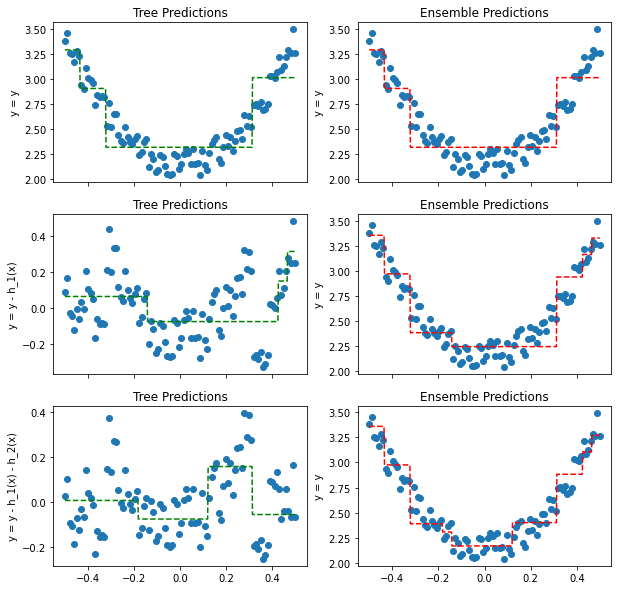

In [20]:
from sklearn.tree import DecisionTreeRegressor

fig,ax = plt.subplots(nrows =3,ncols=2,figsize=(10,10),sharex = True)

#generate noisy squared data
rnmin = -.5
rnmax = .5
var = .3

x = np.linspace(rnmin,rnmax,100).reshape(-1,1)
y = 5 * (x ** 2) + 2  + var*np.random.random(100).reshape(-1,1)
xt = np.linspace(rnmin,rnmax,500).reshape(-1,1)


tree_reg1 = DecisionTreeRegressor(max_depth=2).fit(x,y)

ax[0][0].scatter(x,y)
ax[0][0].plot(xt,tree_reg1.predict(xt),'--g')
ax[0][0].set_title('Tree Predictions')
ax[0][0].set_ylabel('y = y')

fin_pred = sum(tmp.predict(xt) for tmp in [tree_reg1])

ax[0][1].scatter(x,y)
ax[0][1].plot(xt,fin_pred,'--r')
ax[0][1].set_title('Ensemble Predictions')
ax[0][1].set_ylabel('y = y')

###############
y2 = y - tree_reg1.predict(x).reshape(-1,1)
tree_reg2 = DecisionTreeRegressor(max_depth=2).fit(x,y2)

ax[1][0].scatter(x,y2)
ax[1][0].plot(xt,tree_reg2.predict(xt),'--g')
ax[1][0].set_title('Tree Predictions')
ax[1][0].set_ylabel('y = y - h_1(x)')

fin_pred = sum(tmp.predict(xt) for tmp in (tree_reg1,tree_reg2))

ax[1][1].scatter(x,y)
ax[1][1].plot(xt,fin_pred,'--r')
ax[1][1].set_title('Ensemble Predictions')
ax[1][1].set_ylabel('y = y')

################
y3 = y2 - tree_reg2.predict(x).reshape(-1,1)
tree_reg3 = DecisionTreeRegressor(max_depth=2).fit(x,y3)

ax[2][0].scatter(x,y3)
ax[2][0].plot(xt,tree_reg3.predict(xt),'--g')
ax[2][0].set_title('Tree Predictions')
ax[2][0].set_ylabel('y = y - h_1(x) - h_2(x)')

fin_pred = sum(tmp.predict(xt) for tmp in (tree_reg1,tree_reg2,tree_reg3))

ax[2][1].scatter(x,y)
ax[2][1].plot(xt,fin_pred,'--r');
ax[2][1].set_title('Ensemble Predictions');
ax[2][1].set_ylabel('y = y');



### Overfitting with Gradient Boost

Text(0.5, 1.0, 'GBRT with LR  = 0.1')

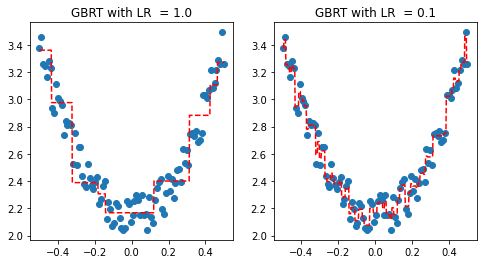

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt1 = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate =1.0)
gbrt1.fit(x,y.ravel())
pred_1 = gbrt1.predict(xt)


gbrt2 = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate =.1)
gbrt2.fit(x,y.ravel())
pred_2 = gbrt2.predict(xt)

_,ax = plt.subplots(ncols=2,figsize=(8,4))

ax[0].scatter(x,y)
ax[0].plot(xt,pred_1,'--r')
ax[0].set_title('GBRT with LR  = 1.0')

ax[1].scatter(x,y)
ax[1].plot(xt,pred_2,'--r')
ax[1].set_title('GBRT with LR  = 0.1')



## Early stopping 

Text(0.5, 1.0, '120')

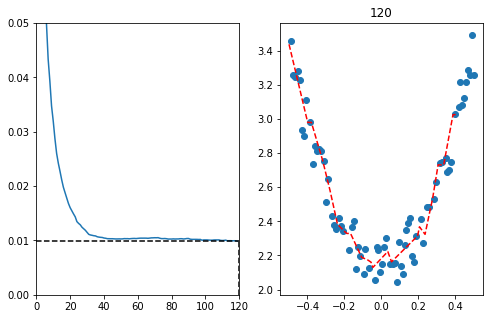

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
np.random.seed(42)

X_train,X_val,y_train,y_val = train_test_split(x,y.ravel())

gbrt = GradientBoostingRegressor(max_depth=2,n_estimators = 120)
gbrt.fit(X_train,y_train)

errors = [mse(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_estimators = np.argmin(errors) + 1

gbr_best = GradientBoostingRegressor(max_depth=2, n_estimators = bst_estimators)
gbr_best.fit(X_train,y_train)

best_preds= gbr_best.predict(np.sort(X_val.ravel()).reshape(-1,1))

_,ax = plt.subplots(ncols=2,figsize=(8,5))

maxy = .05
maxx=  120
ax[0].set_ylim([0,maxy])
ax[0].set_xlim([0,maxx])

ax[0].plot(range(120),errors);
ax[0].axvline(x = bst_estimators, ymax = np.min(errors)/maxy,linestyle = '--',color = 'k')
ax[0].axhline(y = np.min(errors),xmax = bst_estimators/maxx,linestyle = '--',color = 'k')

ax[1].scatter(X_train,y_train)
ax[1].plot(np.sort(X_val.ravel()),best_preds,'--r')
ax[1].set_title(bst_estimators)

## Proper early stopping

Rather than train until the end and then assess optimum number of estimators, use warm_start to stop early

In [23]:
gbrt = GradientBoostingRegressor(max_depth=2,warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators #increase the number of estimators
    gbrt.fit(X_train,y_train)
    
    y_pred = gbrt.predict(X_val)
    val_error = mse(y_val,y_pred) #estimate error
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1 #allow some latency in the reaking
        if error_going_up == 5:
            print('Optimum number of estimators: ' + str(n_estimators))
            print('Lowest error in validation: ' + str(min_val_error))
            break #early stopping
        
        

Optimum number of estimators: 53
Lowest error in validation: 0.010274036457508087


In [24]:
import xgboost

xgb_reg = xgboost.XGBRegressor(verbosity =1)
xgb_reg.fit(X_train,y_train)

y_pred = xgb_reg.predict(X_val)
xgb_reg.fit(X_train,y_train,eval_set=[(X_val, y_val)], early_stopping_rounds=5)
y_pred = xgb_reg.predict(X_val)

mse(y_val,y_pred)

/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-rmse:1.47262
[1]	validation_0-rmse:1.06170
[2]	validation_0-rmse:0.77002
[3]	validation_0-rmse:0.56332
[4]	validation_0-rmse:0.41962
[5]	validation_0-rmse:0.30863
[6]	validation_0-rmse:0.23864
[7]	validation_0-rmse:0.19230
[8]	validation_0-rmse:0.16066
[9]	validation_0-rmse:0.14067
[10]	validation_0-rmse:0.12954
[11]	validation_0-rmse:0.12382
[12]	validation_0-rmse:0.11937
[13]	validation_0-rmse:0.11559
[14]	validation_0-rmse:0.11348
[15]	validation_0-rmse:0.11295
[16]	validation_0-rmse:0.11144
[17]	validation_0-rmse:0.11092
[18]	validation_0-rmse:0.11125
[19]	validation_0-rmse:0.11135
[20]	validation_0-rmse:0.11231
[21]	validation_0-rmse:0.11216
[22]	validation_0-rmse:0.11311


0.012302982140147823

# Exercise 8

In [1]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
data = fetch_openml('mnist_784',version=1)
X = data['data']
y = data['target']

Text(0.5, 1.0, 'Num vectors: [153]')

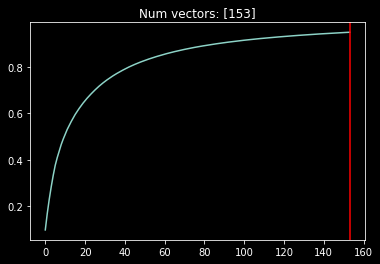

In [3]:
my_pca = PCA(n_components=.95)
Xnew = my_pca.fit_transform(X)


ratio =np.cumsum(my_pca.explained_variance_ratio_)
plt.plot(range(len(ratio)),ratio)
plt.axvline(np.argwhere(ratio > .95)[0],color='red')
plt.title('Num vectors: ' + str(np.argwhere(ratio>.95)[0]))

In [6]:
X_train,X_test,y_train,y_test = train_test_split(Xnew,y,test_size = 20000)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size = .5)

In [10]:
lr = LogisticRegression(solver='saga',C = 10**-5,penalty = 'l2',max_iter = 1000).fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9137

In [13]:
rf = RandomForestClassifier(bootstrap = False,criterion = 'gini',max_depth = 32,min_samples_split = .5, n_estimators = 550).fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.6867

In [ ]:
best_params = {'lr':{'C':10**-3,'penalty':'l2','max_iter'=1000},
               'rf':{'bootstrap':False,'criterion':'gini','max_depth':32,'min_samples_split':.5,'n_estimator':32}}

In [15]:
ran_forest_params = {'n_estimators':np.arange(200,2000,500),'max_depth':[2,4,8],
                 'min_samples_split':np.arange(0,101,50)/100,
                 'bootstrap':[True, False]}

svc_params = {'C':10**np.arange(-5,5,dtype=float),'gamma':10**np.arange(-3,3,dtype=float)}

gs_cv = GridSearchCV(RandomForestClassifier(),ran_forest_params,cv=3).fit(X_train,y_train)

y_preds = gs_cv.best_estimator_.predict(X_test)
accuracy_score(y_test,y_preds)

    

/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/Gerardo/.virtualenvs/ml/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch

0.6823

In [41]:
import joblib
joblib.dump(gs_cv,'cv_results_random_forest.pkl')

['cv_results_random_forest.pkl']

In [40]:
tmp = pd.DataFrame(gs_cv.cv_results_,columns=gs_cv.cv_results_.keys())

pd.crosstab(index=tmp[['param_max_depth','param_min_samples_split','param_n_estimators']],columns = tmp[['mean_test_score','rank_test_score']])
#tmp[tmp['rank_test_score'] > 60]

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [ ]:
group_pred = []
for voting_type in ('hard','soft'): #test different voting methods
    
    my_ensemble  = VotingClassifier([
                        ('ran_forest',RandomForestClassifier(**best_params[0])),
                        ('extra_trees',ExtraTreesClassifier(**best_params[1])),
                        ('svc',SVC(probability=True,**best_params[2])),
                        ('lr',LogisticRegression(**best_params[3])),
                        ],voting = voting_type)

    my_ensemble.fit(X_train,y_train)
    group_preds = my_ensemble.predict(X_test)
    group_pred.append(accuracy_score(y_test,group_preds))
    
    print(f'Accuracy of {voting_type} method: {group_pred[0]}')

# Exercise 9

In [ ]:
from sklearn.base import clone

new_preds= np.empty((y_val.shape[0],len(models)))
for i,models in enumerate(models):
    new_preds[:,i] = models.predict(X_val) #create a layer of predictions based on initial classifiers
    

blender_params = {'n_estimators':np.arange(50,2000,500),'max_depth':[2,4,8,16,32],
                 'min_samples_split':np.arange(0,101,50)/100,'criterion':['gini','entropy'],
                 'bootstrap':[True, False]}

blender = GridSearchCV(RandomForestClassifier(),blender_params,cv = 5) #use grid search on the blender (2nd layer)
blender.fit(new_preds,y_val)


X_test_2 = np.empty((y_val.shape[0],len(models)))
for i,models in enumerate(models):
    X_test_2[:,i] = models.predict(X_test) #Create the base layer of predictions on the testing layer
    
y_test_2 = blender.best_estimator_.predict(X_test_2) # make the predictions on the testing set
print(accuracy_score(y_test,y_test_2)) 
